# Welcome!
### For this analysis, I want to analyze the difference in player performance during the playoffs and regular season for the 2023-2024 season. In order to analyze their performance, we're going to use a statistic known as player efficiency (denoted EFF). EFF is calculated by adding their "positive" stats (e.g. Points, Rebounds) and subtracting their "negative" stats (e.g. Turnovers, Field Goals Missed). The complete formula is below:

\begin{align}
EFF = \frac{(PTS + REB + AST + BLK) - (FG Missed + FT Missed + TOV)}{GP}
\end{align}

### We will use this statistics to analyze who really steps up their game during the playoffs, and who is not themselves during the playoffs.

In [201]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew, norm
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')

### Let's start by processing the data. We are going to limit this analysis to the 2023-2024 to keep it relevant. We're then going to make columns for regular season EFF, playoff season EFF, and the difference between them.

In [202]:
playoff_data = pd.read_csv('Playoffs.csv')
regular_data = pd.read_csv('Regular_Season.csv')

# Data for the 2023-2024 season
filtered_regular_data = regular_data[regular_data['year'] == "2023-24"]
filtered_playoff_data = playoff_data[playoff_data['year'] == "2023-24"]

# Merging the dataframes for analysis
df = pd.merge(filtered_regular_data,filtered_playoff_data, on=['PLAYER_ID','year'], suffixes=['_reg', '_poff'])

# Creating EFF columns
df['EFF_reg'] = (df['PTS_reg'] + df['REB_reg'] + df['AST_reg'] + df['STL_reg'] + df['BLK_reg']
                 - (df['FGA_reg']-df['FGM_reg']) - (df['FTA_reg']-df['FTM_reg']) - df['TOV_reg']) / df['GP_reg']
df['EFF_poff'] = (df['PTS_poff'] + df['REB_poff'] + df['AST_poff'] + df['STL_poff'] + df['BLK_poff']
                 - (df['FGA_poff']-df['FGM_poff']) - (df['FTA_poff']-df['FTM_poff']) - df['TOV_poff']) / df['GP_poff']
df['EFF_diff']= df['EFF_poff']-df['EFF_reg']

# This is ensuring that we have players that actually played during the playoffs by making sure they played at least 4 games (the minimum length of a single series.)
df=df[df['GP_poff']>=4]
df

,Unnamed: 0.1_reg,Unnamed: 0_reg,year,Season_type_reg,PLAYER_ID,RANK_reg,PLAYER_reg,TEAM_ID_reg,TEAM_reg,GP_reg,...,STL_poff,BLK_poff,TOV_poff,PF_poff,PTS_poff,AST_TOV_poff,STL_TOV_poff,EFF_reg,EFF_poff,EFF_diff
0,5687,8049,2023-24,Regular_Season,1629029,1,Luka Doncic,1610612742,DAL,70,...,41,8,90,56,635,1.98,0.46,36.857143,30.227273,-6.629870
1,5688,8050,2023-24,Regular_Season,1628983,2,Shai Gilgeous-Alexander,1610612760,OKC,75,...,13,17,22,31,302,2.91,0.59,32.213333,31.600000,-0.613333
2,5690,8052,2023-24,Regular_Season,1628973,4,Jalen Brunson,1610612752,NYK,77,...,10,2,35,26,421,2.77,0.29,25.610390,24.769231,-0.841159
3,5691,8053,2023-24,Regular_Season,203999,5,Nikola Jokic,1610612743,DEN,79,...,17,8,40,32,344,2.60,0.42,38.468354,39.666667,1.198312
4,5692,8054,2023-24,Regular_Season,1630162,6,Anthony Edwards,1610612750,MIN,79,...,24,9,52,37,441,2.00,0.46,23.582278,28.187500,4.605222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,6161,8523,2023-24,Regular_Season,1629216,474,Gabe Vincent,1610612747,LAL,11,...,2,0,3,8,7,1.00,0.67,3.000000,1.600000,-1.400000
205,6192,8554,2023-24,Regular_Season,1631112,505,Kendall Brown,1610612754,IND,15,...,0,1,3,2,4,0.67,0.00,1.266667,0.428571,-0.838095
207,6199,8561,2023-24,Regular_Season,1631111,511,Wendell Moore Jr.,1610612750,MIN,25,...,1,0,1,3,7,2.00,1.00,1.160000,1.166667,0.006667
209,6206,8568,2023-24,Regular_Season,1629610,519,DaQuan Jeffries,1610612752,NYK,17,...,1,0,0,2,8,0.00,0.00,0.529412,2.000000,1.470588


In [203]:
# Dropping unnecessary columns
df=df.drop(columns=['Unnamed: 0.1_reg', 'Unnamed: 0_reg'])

In [204]:
# Creating an EFF df for analysis
eff_df=df[['PLAYER_ID','PLAYER_reg','EFF_reg','EFF_poff','EFF_diff']]
eff_df.head()

,PLAYER_ID,PLAYER_reg,EFF_reg,EFF_poff,EFF_diff
0,1629029,Luka Doncic,36.857143,30.227273,-6.629870
1,1628983,Shai Gilgeous-Alexander,32.213333,31.600000,-0.613333
2,1628973,Jalen Brunson,25.610390,24.769231,-0.841159
3,203999,Nikola Jokic,38.468354,39.666667,1.198312
4,1630162,Anthony Edwards,23.582278,28.187500,4.605222


### Next is an interactive visualization that shows us the difference in each player's EFF ratings from playoffs to regular season.

In [205]:
# Using a plotly bar graph for interactivity
fig = go.Figure(data=[
    go.Bar(x=eff_df['PLAYER_reg'], y=eff_df['EFF_diff'])
])

fig.update_layout(
    title='Difference in Playoff and Regular Season PER for Each Player in the 2023-2024 season',
    xaxis_title='Player',
    yaxis_title='Playoff and Regular Season PER Difference',
    height=800, width=4500,
    template='seaborn'
)


fig.show()


### Let's get a sense of how the data is distributed. We will calculate the moments of the distribution to start. The skewness and kurtosis are quite close to 0, so we will assume that the data is normally distributed when we create the distribution plot. It seems like players tend to play worse in the playoffs, at least for this season.

In [206]:
mean, std_dev, skewness, kurt = np.mean(eff_df['EFF_diff']), np.std(eff_df['EFF_diff']), skew(eff_df['EFF_diff']), kurtosis(eff_df['EFF_diff'])
print(f'Mean: {mean} \nStd Dev: {std_dev} \nSkewness={skewness} \nKurtosis: {kurt}')

Mean: -2.1139269553466624 
Std Dev: 3.6781457478385406 
Skewness=0.11117729383780259 
Kurtosis: -0.14624723901546677


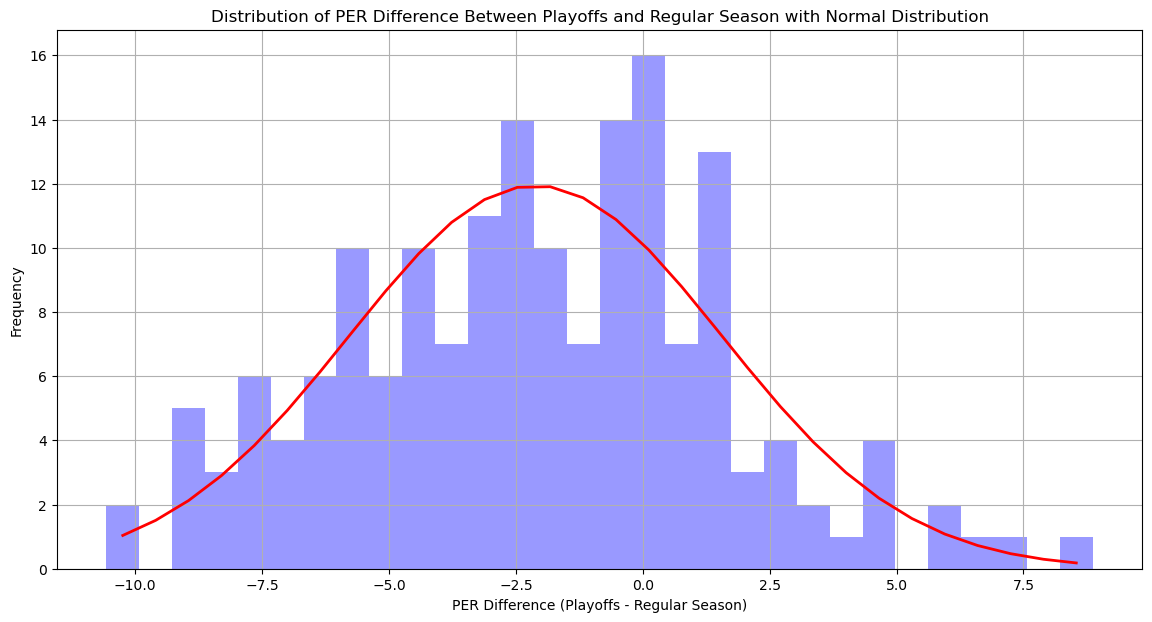

In [207]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Plot the histogram
plt.figure(figsize=(14, 7))
count, bins, ignored = plt.hist(eff_df['EFF_diff'], bins=30, alpha=0.4, color='b', density=False)

# Calculate the normal distribution curve scaled to histogram
bin_centers = 0.5 * (bins[1:] + bins[:-1])
pdf = norm.pdf(bin_centers, mean, std_dev) * sum(count) * np.diff(bins)

# Plot the normal distribution curve
plt.plot(bin_centers, pdf, color='red', linewidth=2)

plt.title('Distribution of PER Difference Between Playoffs and Regular Season with Normal Distribution')
plt.xlabel('PER Difference (Playoffs - Regular Season)')
plt.ylabel('Frequency')

plt.grid(True)
plt.show()

### Finally, let's find out who step up their game for the playoffs and who underperforms their norm. We'll take a look at the top/bottom in either category. To do this, we will find the top 5% and bottom 5% of players who change their game in the playoffs. We do this by calculating:

\begin{align}
top5\% = EFF\_diff >= μ + 1.645σ \newline

bottom5\% = EFF\_diff <= μ - 1.645σ
\end{align}

In [214]:
top5pct = mean + 1.645*std_dev
bottom5pct = mean - 1.645*std_dev

top_performers = eff_df[eff_df['EFF_diff']>=top5pct].sort_values(by='EFF_diff', ascending=False)
worst_performers = eff_df[eff_df['EFF_diff']<=bottom5pct].sort_values(by='EFF_diff')

display(top_performers)
display(worst_performers)

,PLAYER_ID,PLAYER_reg,EFF_reg,EFF_poff,EFF_diff
74,203114,Khris Middleton,17.636364,26.500000,8.863636
97,1629614,Andrew Nembhard,10.911765,17.882353,6.970588
90,202692,Alec Burks,8.151515,14.500000,6.348485
7,203076,Anthony Davis,33.526316,39.400000,5.873684
82,1628404,Josh Hart,16.530864,22.307692,5.776828
164,1626153,Delon Wright,7.319149,12.000000,4.680851
4,1630162,Anthony Edwards,23.582278,28.187500,4.605222
10,1630178,Tyrese Maxey,23.742857,28.333333,4.590476
135,1631107,Nikola Jovic,10.065217,14.400000,4.334783
122,201976,Patrick Beverley,9.232877,13.500000,4.267123


,PLAYER_ID,PLAYER_reg,EFF_reg,EFF_poff,EFF_diff
100,1630188,Jalen Smith,13.426230,2.857143,-10.569087
61,1629130,Duncan Robinson,12.147059,2.000000,-10.147059
114,202330,Gordon Hayward,11.352941,2.142857,-9.210084
102,1630194,Paul Reed,12.634146,3.666667,-8.967480
28,1627742,Brandon Ingram,21.375000,12.500000,-8.875000
84,201566,Russell Westbrook,13.882353,5.166667,-8.715686
37,204001,Kristaps Porzingis,23.263158,14.571429,-8.691729
116,201567,Kevin Love,12.618182,4.000000,-8.618182
80,1627777,Georges Niang,9.304878,1.000000,-8.304878


# Conclusion
### Through this analysis, we are able to roughly see how player performances change from the transition in regular season to playoffs. Note that this measurement does not truly encapsulate player performance; if a player averages a EFF rating of 34 for the regular season and averages 30 during the playoffs, they are still playing incredibly efficient. This is more so for us to view how players that may not do so well during the regular season perform at an elite level, and vice versa. Perhaps a more captivating statistic to use is the PER, which scales the importance of player's stats based off of how it contributes to the team performance.

### In any case, I hope you enjoyed this analysis. Upvotes, comments, and feedback is always appreciated. Thank you!